In [1]:
push!(LOAD_PATH, "/home/cfpark/Projects/WST3D/DHC/main/")
import DHC_2DUtils
import Plots
import CUDA
import TimerOutputs
import Statistics
import Profile

In [2]:
N_repeat=30;

In [3]:
hash_gpu=DHC_2DUtils.fink_filter_hash_gpu(1,8)
t_run=Float32[]
for i in 1:N_repeat
    image=randn(256,256);
    append!(t_run,@TimerOutputs.elapsed res_gpu=DHC_2DUtils.DHC_compute_gpu(image,hash_gpu,doS2=true,doS12=true, doS20=true))
end
Statistics.mean(t_run)

LoadError: InterruptException:

In [4]:
hash=DHC_2DUtils.fink_filter_hash(1,8)
t_run=Float32[]
for i in 1:N_repeat
    image=randn(256,256);
    append!(t_run,@TimerOutputs.elapsed res=DHC_2DUtils.DHC_compute(image,hash,doS2=true,doS12=false, doS20=false,FFTthreads=8))
end
Statistics.mean(t_run)

0.28367135f0

In [5]:
image=randn(256,256)
res=DHC_2DUtils.DHC_compute(image,hash,doS2=true,doS12=true, doS20=true)
res_gpu=DHC_2DUtils.DHC_compute_gpu(image,hash_gpu,doS2=true,doS12=true, doS20=true);

In [6]:
Plots.plot((res_gpu.-res))
Plots.plot!(ylim=(-1e-11,1e-11),ylabel="difference",xlabel="coeff #")

LoadError: InterruptException:

In [10]:
image=randn(256,256)
@Profile.profile res_gpu=DHC_2DUtils.DHC_compute_gpu(image,hash_gpu,doS2=true,doS12=true, doS20=true);
Profile.print()

Overhead ╎ [+additional indent] Count File:Line; Function
   ╎303 @Base/task.jl:406; (::IJulia.var"#15#18")()
   ╎ 303 @IJulia/src/eventloop.jl:8; eventloop(socket::ZMQ.Socket)
   ╎  303 @Base/essentials.jl:706; invokelatest
   ╎   303 @Base/essentials.jl:707; #invokelatest#2
   ╎    303 .../execute_request.jl:67; execute_request(socket::ZMQ.So...
   ╎     303 .../SoftGlobalScope.jl:65; softscope_include_string(m::Mo...
   ╎    ╎ 303 @Base/loading.jl:1090; include_string(mapexpr::type...
  5╎    ╎  303 @Base/boot.jl:360; eval
   ╎    ╎   298 ...in/DHC_2DUtils.jl:469; (::DHC_2DUtils.var"#DHC_com...
   ╎    ╎    298 ...in/DHC_2DUtils.jl:469; DHC_compute_gpu##kw
   ╎    ╎     2   ...n/DHC_2DUtils.jl:497; DHC_compute_gpu(image::Mat...
   ╎    ╎    ╎ 2   @CUDA/src/array.jl:348; zeros(::Type, ::Int64, ::...
   ╎    ╎    ╎  2   .../construction.jl:5; fill!(A::CUDA.CuArray{Floa...
   ╎    ╎    ╎   2   ...ce/execution.jl:46; gpu_call
   ╎    ╎    ╎    2   ...ce/execution.jl:63; gpu_call(::GPUAr

   ╎    ╎    ╎    ╎  1   ...c/gpuarrays.jl:30; (::GPUArrays.var"#gpu_...
   ╎    ╎    ╎    ╎   1   .../gpuarrays.jl:30; #gpu_call#281
   ╎    ╎    ╎    ╎    1   .../execution.jl:104; macro expansion
   ╎    ╎    ╎    ╎     1   ...execution.jl:365; Any##kw
   ╎    ╎    ╎    ╎    ╎ 1   ...execution.jl:365; #_#226
   ╎    ╎    ╎    ╎    ╎  1   ...xecution.jl:164; call##kw
   ╎    ╎    ╎    ╎    ╎   1   ...xecution.jl:164; #call#204
   ╎    ╎    ╎    ╎    ╎    1   ...xecution.jl:193; macro expansion
   ╎    ╎    ╎    ╎    ╎     1   ...ecution.jl:209; cudacall##kw
   ╎    ╎    ╎    ╎    ╎    ╎ 1   ...ecution.jl:213; #cudacall#220
   ╎    ╎    ╎    ╎    ╎    ╎  1   ...cution.jl:137; cudacall##kw
   ╎    ╎    ╎    ╎    ╎    ╎   1   ...cution.jl:137; #cudacall#22
   ╎    ╎    ╎    ╎    ╎    ╎    1   ...cution.jl:79; convert_arguments
   ╎    ╎    ╎    ╎    ╎    ╎     1   ...cution.jl:97; macro expansion
   ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1   ...cution.jl:138; #23
   ╎    ╎    ╎    ╎    ╎    ╎ 

  3╎    ╎    ╎    ╎    ╎    ╎    3   ...ibcuda.jl:499; macro expansion
   ╎    ╎     3   ...n/DHC_2DUtils.jl:539; DHC_compute_gpu(image::Mat...
   ╎    ╎    ╎ 2   ...c/definitions.jl:383; ifftshift
   ╎    ╎    ╎  2   .../definitions.jl:384; ifftshift(x::CUDA.CuArray...
   ╎    ╎    ╎   2   ...actarraymath.jl:133; circshift
   ╎    ╎    ╎    2   ...dimensional.jl:1113; circshift!(dest::CUDA.C...
   ╎    ╎    ╎     1   ...dimensional.jl:1144; _circshift!
   ╎    ╎    ╎    ╎ 1   ...imensional.jl:1145; _circshift!
   ╎    ╎    ╎    ╎  1   ...imensional.jl:1149; _circshift!
   ╎    ╎    ╎    ╎   1   ...tractarray.jl:191; copyto!(dest::CUDA.Cu...
   ╎    ╎    ╎    ╎    1   .../execution.jl:46; gpu_call##kw
   ╎    ╎    ╎    ╎     1   .../execution.jl:63; gpu_call(::typeof(GPU...
   ╎    ╎    ╎    ╎    ╎ 1   ...gpuarrays.jl:30; gpu_call##kw
   ╎    ╎    ╎    ╎    ╎  1   ...gpuarrays.jl:30; #gpu_call#281
   ╎    ╎    ╎    ╎    ╎   1   ...xecution.jl:104; macro expansion
   ╎    ╎    ╎    ╎   

   ╎    ╎    ╎    ╎    ╎    ╎    ╎   1   ...cution.jl:79; convert_arguments
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    1   ...cution.jl:97; macro expansion
   ╎    ╎    ╎    ╎    ╎    ╎    ╎     1   ...cution.jl:138; #23
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 1   ...cution.jl:55; launch##kw
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  1   ...cution.jl:62; launch(::CUDA.C...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1   ...cution.jl:9; pack_arguments
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1   ...cution.jl:33; macro expansion
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎     1   ...cution.jl:69; (::CUDA.var"#18...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +1 1   ...s/call.jl:26; cuLaunchKernel
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +2 1   .../error.jl:102; macro expansion
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +3 1   ...ibcuda.jl:1227; macro expansion
   ╎    ╎    ╎ 22  ...lib/cufft/fft.jl:238; fft(x::CUDA.CuArray{Float...
   ╎    ╎    ╎  22  ...ib/cufft/fft.jl:238; fft
   ╎    ╎    ╎   17  ...

   ╎    ╎    ╎    ╎    ╎    ╎ 8   ...ecution.jl:213; #cudacall#220
   ╎    ╎    ╎    ╎    ╎    ╎  8   ...cution.jl:137; cudacall##kw
   ╎    ╎    ╎    ╎    ╎    ╎   8   ...cution.jl:137; #cudacall#22
   ╎    ╎    ╎    ╎    ╎    ╎    8   ...cution.jl:79; convert_arguments
   ╎    ╎    ╎    ╎    ╎    ╎     8   ...cution.jl:97; macro expansion
   ╎    ╎    ╎    ╎    ╎    ╎    ╎ 8   ...cution.jl:138; #23
   ╎    ╎    ╎    ╎    ╎    ╎    ╎  8   ...cution.jl:55; launch##kw
   ╎    ╎    ╎    ╎    ╎    ╎    ╎   8   ...cution.jl:62; launch(::CUDA.C...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    8   ...cution.jl:9; pack_arguments
   ╎    ╎    ╎    ╎    ╎    ╎    ╎     8   ...cution.jl:33; macro expansion
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 8   ...cution.jl:69; (::CUDA.var"#18...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  8   ...s/call.jl:26; cuLaunchKernel
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎   8   .../error.jl:102; macro expansion
  8╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎    8   ...ibcuda.jl:1227;

   ╎    ╎    ╎    ╎    ╎    ╎    ╎ 5   ...cution.jl:137; cudacall##kw
   ╎    ╎    ╎    ╎    ╎    ╎    ╎  5   ...cution.jl:137; #cudacall#22
   ╎    ╎    ╎    ╎    ╎    ╎    ╎   5   ...cution.jl:79; convert_arguments
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    5   ...cution.jl:97; macro expansion
   ╎    ╎    ╎    ╎    ╎    ╎    ╎     5   ...cution.jl:138; #23
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 5   ...cution.jl:55; launch##kw
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  4   ...cution.jl:62; launch(::CUDA.C...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎   4   ...cution.jl:9; pack_arguments
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎    4   ...cution.jl:33; macro expansion
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎     4   ...cution.jl:69; (::CUDA.var"#18...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +1 4   ...s/call.jl:26; cuLaunchKernel
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +2 4   .../error.jl:102; macro expansion
  4╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +3 4   ...ibcuda.jl:1227; macro expansion
   ╎

   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1   ...e/boot.jl:457; Array
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎    1   ...e/boot.jl:448; Array
   ╎    ╎    ╎    ╎    ╎    ╎    ╎   15  ...cution.jl:33; macro expansion
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    15  ...cution.jl:69; (::CUDA.var"#18...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎     15  ...s/call.jl:26; cuLaunchKernel
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ 15  .../error.jl:102; macro expansion
 15╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  15  ...ibcuda.jl:1227; macro expansion
   ╎    ╎     2   ...n/DHC_2DUtils.jl:574; DHC_compute_gpu(image::Mat...
   ╎    ╎    ╎ 2   @Base/array.jl:977; append!(a::Vector{Any}, i...
   ╎    ╎    ╎  2   ...bstractarray.jl:155; copyto!
   ╎    ╎    ╎   2   @CUDA/src/array.jl:268; copyto!(dest::Vector{Flo...
   ╎    ╎    ╎    2   @CUDA/src/array.jl:299; unsafe_copyto!
   ╎    ╎    ╎     2   ...adrv/memory.jl:388; unsafe_copyto!
   ╎    ╎    ╎    ╎ 2   ...adrv/memory.jl:395; #unsafe_copyto!#6
   ╎    ╎    ╎    ╎  

In [16]:
hash=DHC_2DUtils.fink_filter_hash(1,8);

In [17]:
hash3d=DHC_2DUtils.fink_filter_bank_3dizer(hash,1, nz=256);

In [18]:
hash3d[]

Dict{Any, Any} with 20 entries:
  "filt_index"     => Vector{CartesianIndex{3}}[[CartesianIndex(13, 31, 34), Ca…
  "2d_J_L"         => Int32[0 0; 1 0; … ; 5 7; 6 0]
  "S2_iso_mat"     => …
  "2d_psi_index"   => Int32[1 7 … 37 43; 2 8 … 38 44; … ; 5 11 … 41 47; 6 12 … …
  "2d_phi_index"   => 49
  "psi_index"      => Int32[1 37 … 217 253; 7 43 … 223 259; … ; 31 67 … 247 283…
  "cz"             => 1
  "2d_pc"          => 1
  "k_value"        => [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
  "npix"           => 256
  "S1_iso_mat"     => …
  "theta_value"    => [0.0, 0.392699, 0.785398, 1.1781, 1.5708, 1.9635, 2.35619…
  "nz"             => 256
  "2d_filt_index"  => Vector{CartesianIndex{2}}[[CartesianIndex(13, 31), Cartes…
  "2d_filt_value"  => [[0.00151097, 0.00151097, 0.000831601, 0.0119073, 0.01802…
  "J_L_K"          => Int32[1 37 … 217 253; 7 43 … 223 259; … ; 31 67 … 247 283…
  "2d_wd"          => [1.0, 1.0, 1.0, 1.0, 1.0, 2.0]
  "2d_fs_center_r" => [64.0, 32.0, 16.0, 8.0, 4.0, 2.0]
  "filt_value"

In [22]:
size(hash["filt_value"])

(49,)

In [ ]:
size(hash["filt_value"])

In [21]:
size(hash3d["filt_value"][1])

(572375,)

In [25]:
size(hash3d["filt_index"][1])

(572375,)

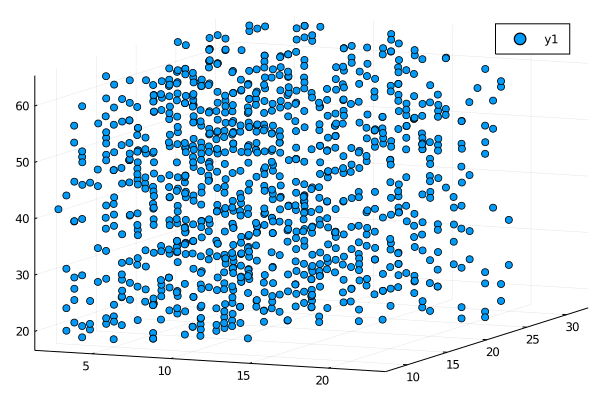

In [45]:
find=50
inds=rand(1:size(hash3d["filt_index"][find])[1],1000)
ps=hash3d["filt_index"][find][inds]
x=getindex.(ps,[1]);y=getindex.(ps,[2]);z=getindex.(ps,[3])
Plots.scatter3d(x,y,z)

In [29]:
size(res)

(7254,)

In [10]:
filt,info=DHC_2DUtils.fink_filter_bank(1,8);

In [11]:
import FFTW
function fink_filter_list(filt)
    (ny,nx,Nf) = size(filt)

    # Allocate output arrays
    filtmms = Array{Int64}(undef,2,2,Nf)
    filtvals = Array{Any}(undef,Nf)#is this a terrible way to allocate memory?

    
    # Loop over filters and record non-zero values
    for l=1:Nf
        f = FFTW.fftshift(filt[:,:,l])
        ind = findall(f .> 1E-13)
        ind=getindex.(ind,[1 2])
        mins=minimum(ind,dims=1)
        maxs=maximum(ind,dims=1)
        
        #val = f[ind]
        #filtind[l] = ind
        filtmms[:,1,l] = mins
        filtmms[:,2,l] = maxs
        filtvals[l]=f[mins[1]:maxs[1],mins[2]:maxs[2]]
        
    end
    return [filtmms, filtvals]
end

fink_filter_list (generic function with 1 method)

In [12]:
mms,vals=fink_filter_list(filt);

In [54]:
import CUDA

In [55]:
thisim=CUDA.CUFFT.fft(CUDA.CuArray(randn(Float32,256,256)));

In [56]:
f_mm=mms[:,:,1]
f_val=CUDA.CuArray(vals[1]);

In [57]:
S2=randn(Float32,4,4);

In [58]:
S2[1,1]=sum(abs2.(f_val.*thisim[f_mm[1,1]:f_mm[1,2],f_mm[2,1]:f_mm[2,2]]))/(256*256);

In [128]:
import FFTW


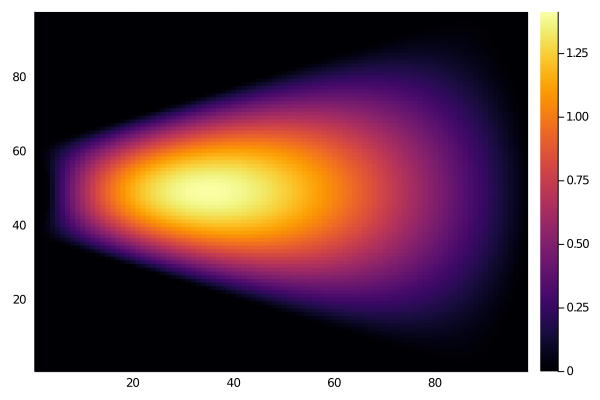

In [195]:
Plots.heatmap(vals[1])

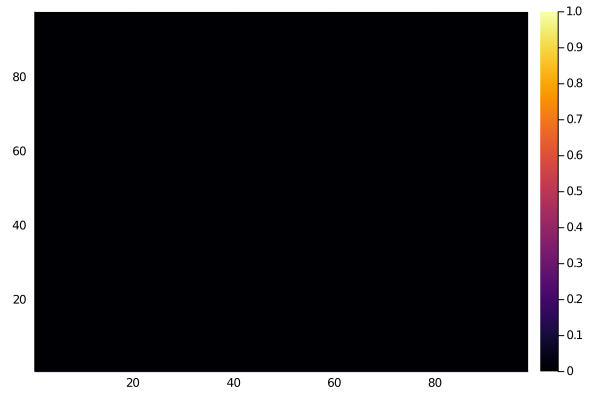

In [198]:
Plots.heatmap(FFTW.ifftshift(FFTW.fftshift(vals[1]))-vals[1])